**Task 1: Exploratory Data Analysis (EDA)**

In [ ]:
#Load Dataset and Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

df=pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
print(df.shape)

(2000, 26)


In [ ]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


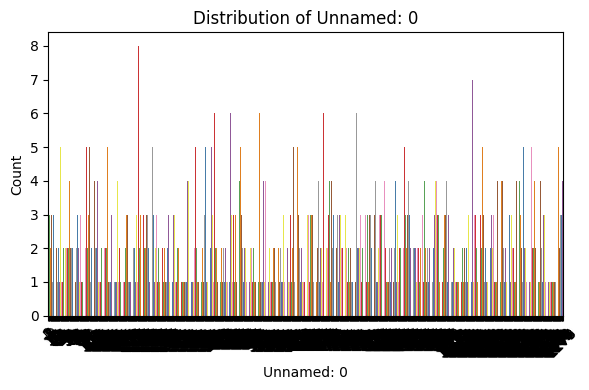

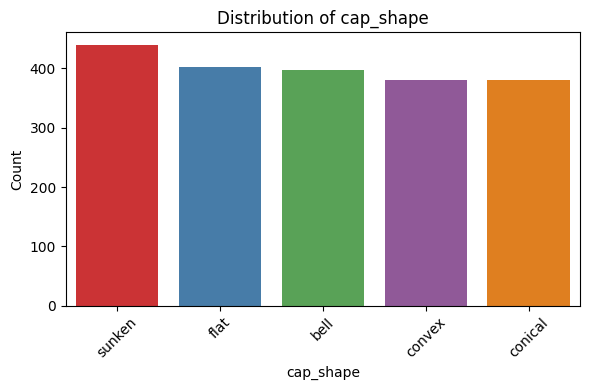

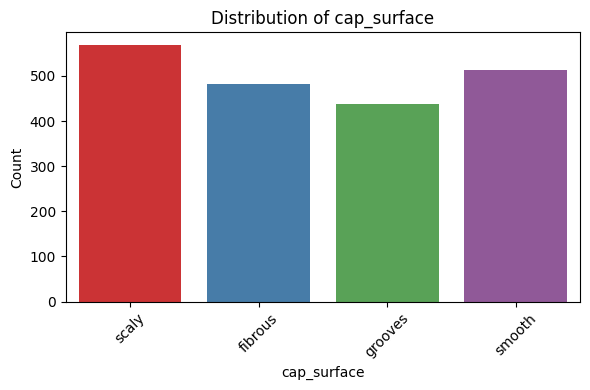

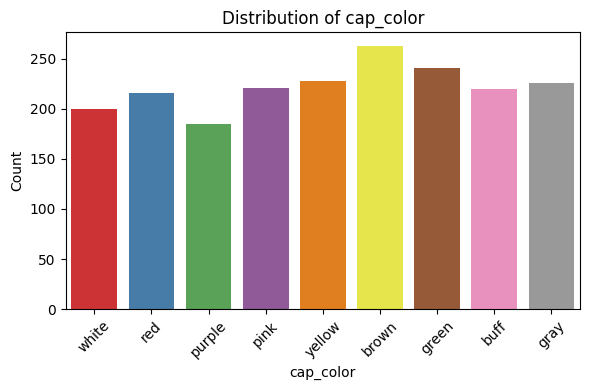

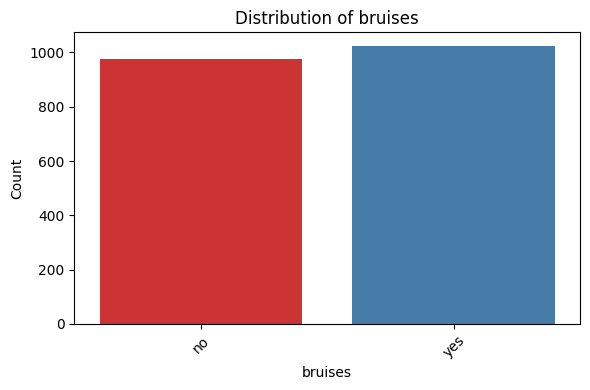

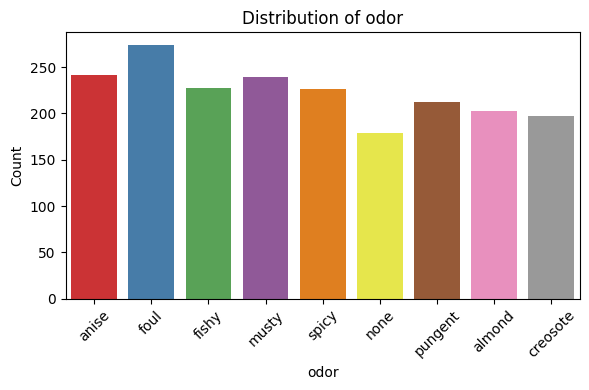

In [ ]:
#Feature Distribution

#1. Histogram
categorical_columns = df.columns[:6]
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, hue=col, palette='Set1', legend=False)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

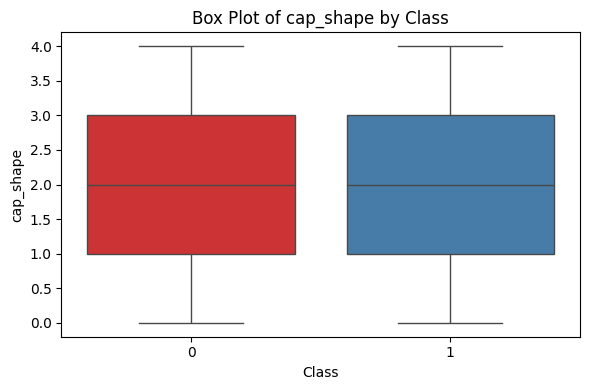

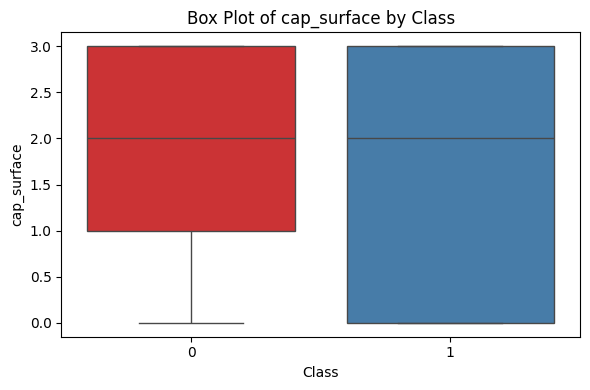

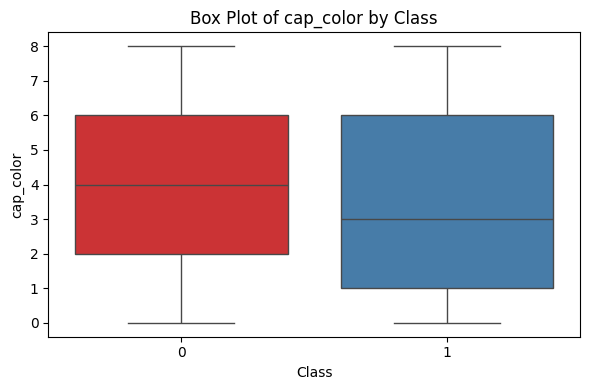

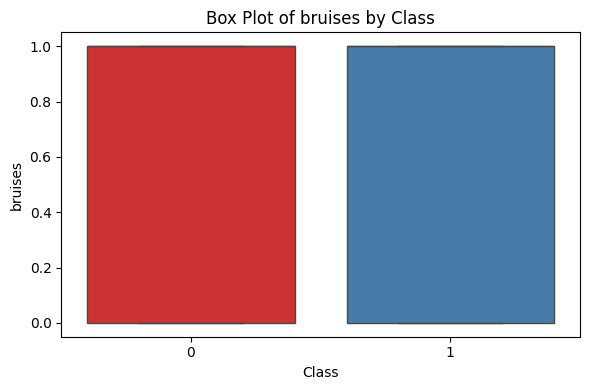

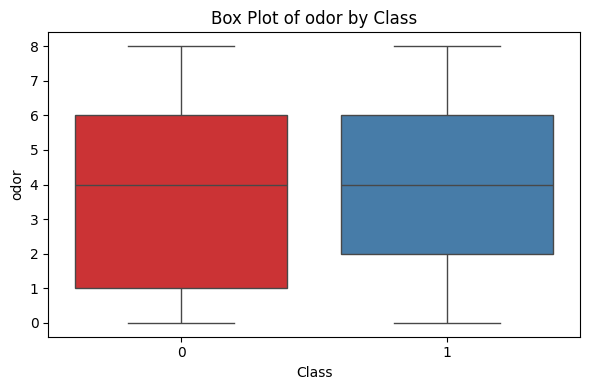

In [ ]:
#2. Box Plot
encoded_df = df.apply(LabelEncoder().fit_transform)
for col in encoded_df.columns[1:6]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y=col, hue='class', legend=False, data=encoded_df, palette='Set1')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} by Class')
    plt.tight_layout()
    plt.show()

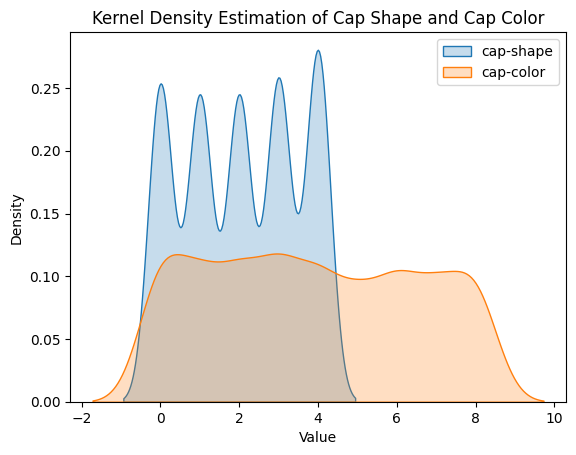

In [ ]:
#KDE
sns.kdeplot(encoded_df['cap_shape'], label='cap-shape', fill=True)
sns.kdeplot(encoded_df['cap_color'], label='cap-color', fill=True)
plt.title('Kernel Density Estimation of Cap Shape and Cap Color')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

**Task 2: Data Preprocessing**

In [ ]:
#Label Encoding
encoded_df = df.copy()
label_encoders = {}
for col in encoded_df.columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le

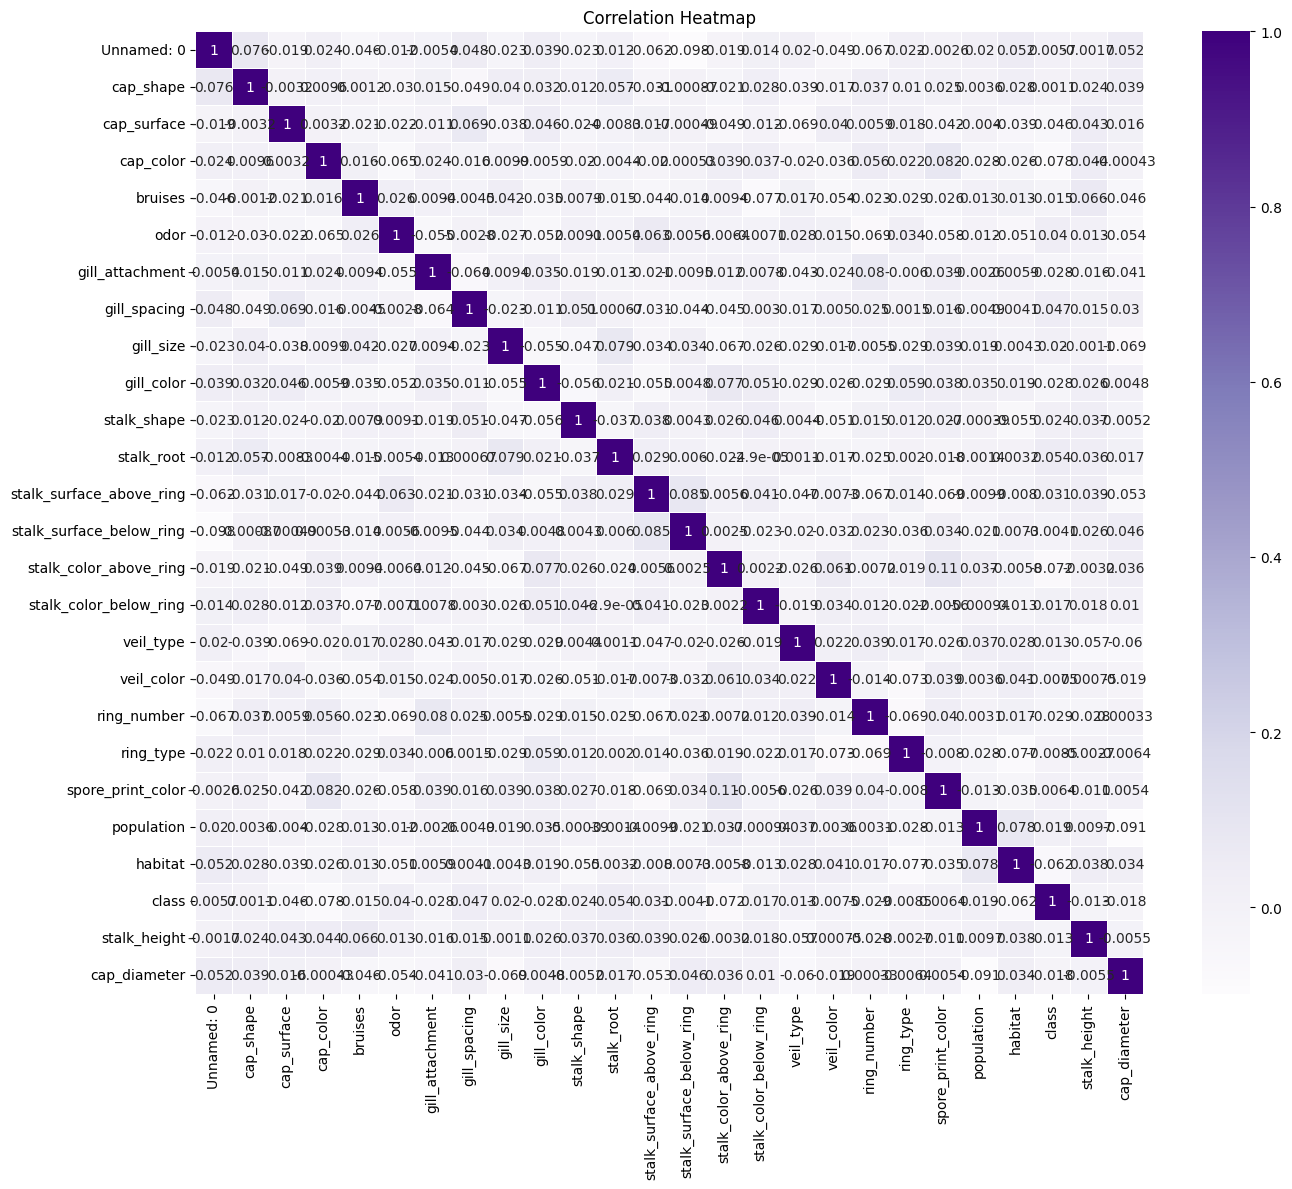

In [ ]:
#Feature Correlation
correlation_matrix = encoded_df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, linewidths=0.5, cmap='Purples', annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
#Split the dataset into training and testing set
X=encoded_df.drop('class',axis=1)
y=encoded_df['class']
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42, stratify=y
    )
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 25)
X_test shape: (400, 25)
y_train shape: (1600,)
y_test shape: (400,)


**Task 3: Data Visualization**

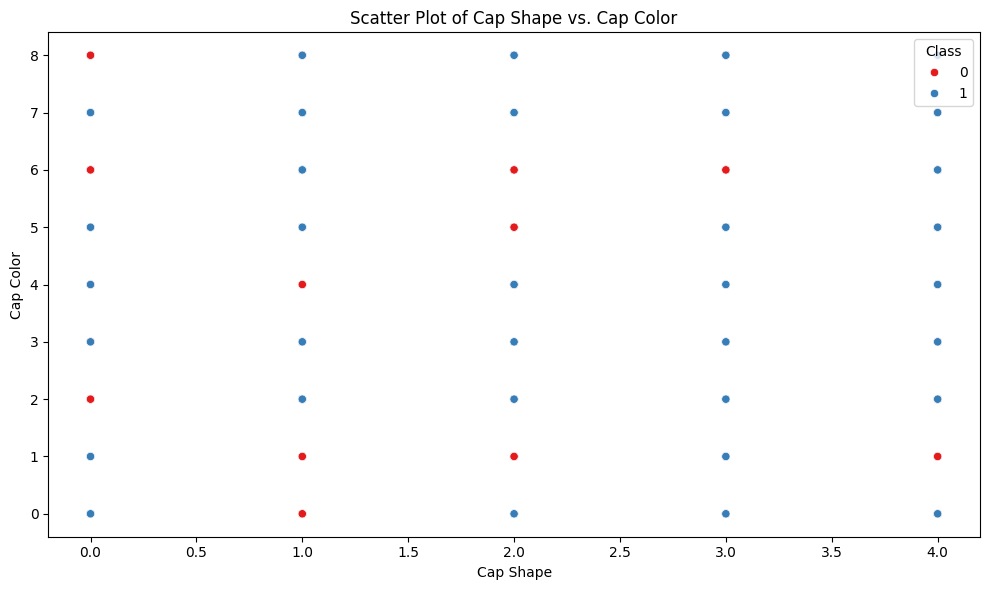

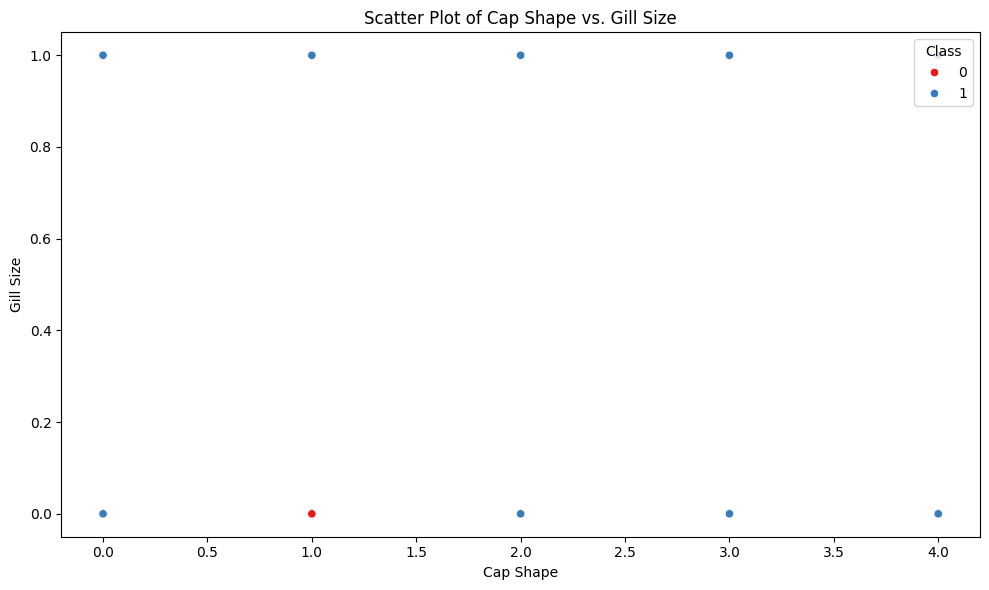

In [ ]:
#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cap_shape', y='cap_color', hue='class', data=encoded_df, palette='Set1')
plt.xlabel('Cap Shape')
plt.ylabel('Cap Color')
plt.title('Scatter Plot of Cap Shape vs. Cap Color')
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='cap_shape', y='gill_size', hue='class', data=encoded_df, palette='Set1')
plt.xlabel('Cap Shape')
plt.ylabel('Gill Size')
plt.title('Scatter Plot of Cap Shape vs. Gill Size')
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()

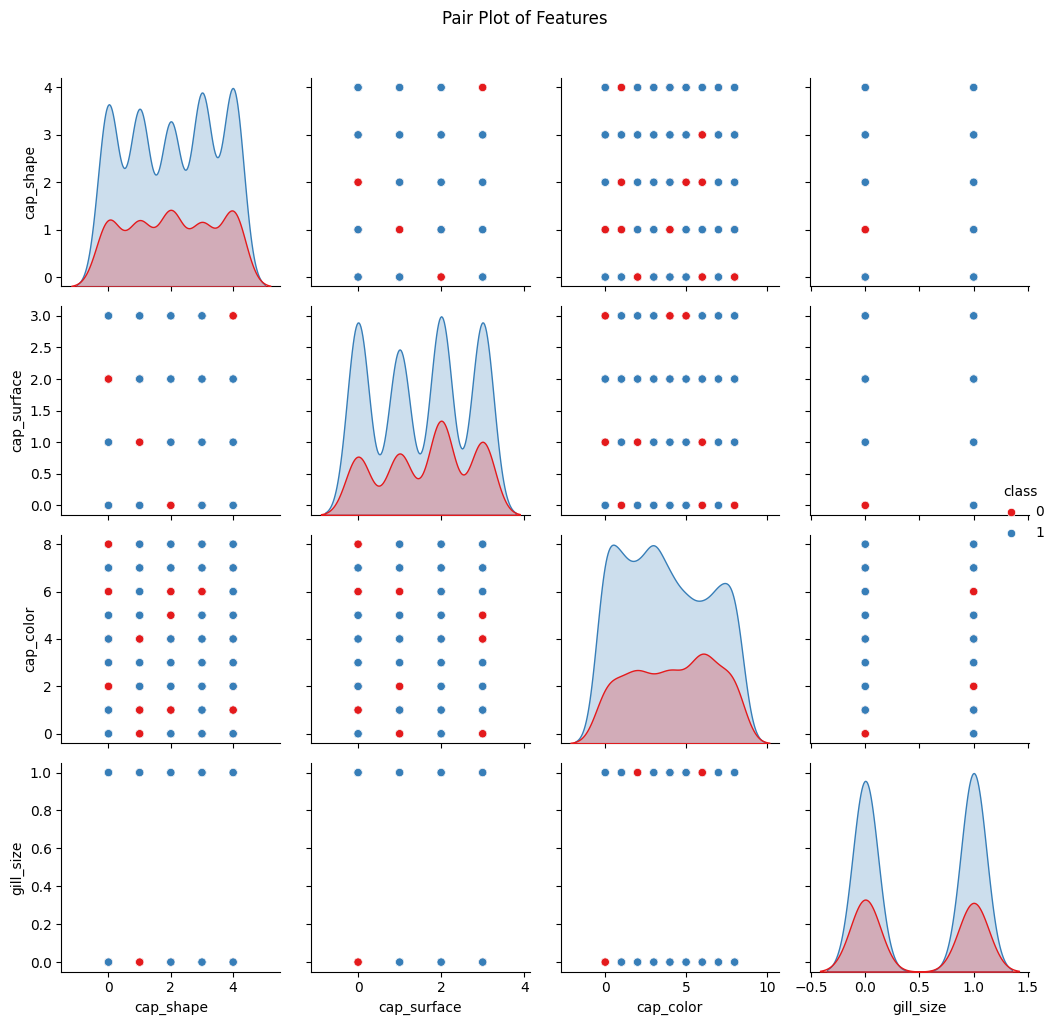

In [ ]:
#Pair Plot
pairplot_features = encoded_df[['cap_shape', 'cap_surface', 'cap_color', 'gill_size', 'class']]
sns.pairplot(pairplot_features, hue='class', palette='Set1')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.tight_layout()
plt.show()

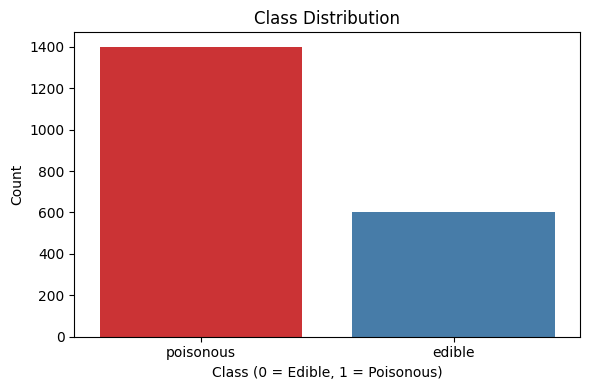

In [ ]:
#Visualize Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', hue='class', data=df, palette='Set1', legend=False)
plt.xlabel('Class (0 = Edible, 1 = Poisonous)')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.tight_layout()
plt.show()

**Task 4: SVM Implementation**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Implement SVM Classifier
#Train SVM Model
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

#Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.78
Precision: 0.7651933701657458
Recall: 0.9892857142857143
F1 Score: 0.8629283489096573

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.29      0.44       120
           1       0.77      0.99      0.86       280

    accuracy                           0.78       400
   macro avg       0.84      0.64      0.65       400
weighted avg       0.81      0.78      0.74       400



**Task 5: Visualization of SVM Results**

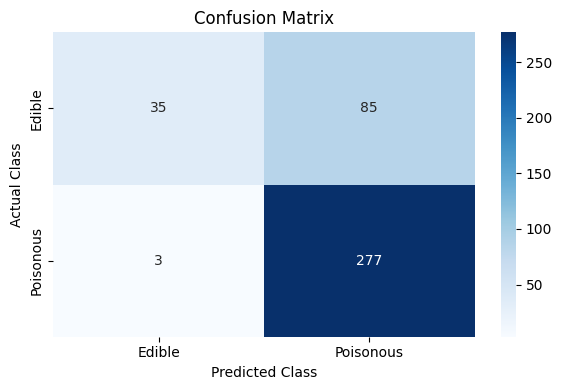

In [ ]:
#Result
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

**Task 6: Parameter Tuning and Optimization**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 0.01, 0.001]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train_scaled, y_train)

print("\nBest Parameters from Grid Search:")
print(grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

y_best_pred = grid.predict(X_test_scaled)
print("\nTest Set Accuracy with Best Model:", accuracy_score(y_test, y_best_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best Parameters from Grid Search:
{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.85125

Test Set Accuracy with Best Model: 0.8575


**Task 7: Comparison and Analysis**

In [ ]:
kernels = ['linear', 'poly', 'rbf']
results = []

for kernel in kernels:
    print(f"\nEvaluating SVM with {kernel} kernel...")
    svm = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Kernel': kernel,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


Evaluating SVM with linear kernel...
Accuracy: 0.7000
Precision: 0.7000
Recall: 1.0000
F1 Score: 0.8235

Evaluating SVM with poly kernel...
Accuracy: 0.8125
Precision: 0.7937
Recall: 0.9893
F1 Score: 0.8808

Evaluating SVM with rbf kernel...
Accuracy: 0.7800
Precision: 0.7652
Recall: 0.9893
F1 Score: 0.8629


In [ ]:
metric_df = pd.DataFrame(results, columns=['Kernel', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("\nSVM Kernel Performance Comparison:")
print(metric_df.sort_values(by='Accuracy', ascending=False))


SVM Kernel Performance Comparison:
   Kernel  Accuracy  Precision    Recall  F1 Score
1    poly    0.8125   0.793696  0.989286  0.880763
2     rbf    0.7800   0.765193  0.989286  0.862928
0  linear    0.7000   0.700000  1.000000  0.823529


1.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

**Strength:**
* High accuracy - The Mushroom dataset is clean, fully categorical, and highly separable, which allows SVM (especially RBF Kernel) to achieve near-perfect accuracy.

* Robust Decision Boundaries - The SVM model forms clear class boundaries, which you observed in scatter plots of encoded features.

**Weakness:**
* Sensitive to feature scaling - without standardScaler, SVM failed to predict both classes - scaling is critical, especially with RBF.

* Not optimal for high-dimensional categories encoding - iIf i used one-hot encoding instead of label encoding, the dimensionality would increase and slow down training.

2.	Discuss practical implications of SVM in real-world classification tasks.

**Uses:**

* Healthcare - Disease Diagnosis
* Finance - Fraud Detection
* Image Recognition - Handwriting, Facial Recognition
* Text Classification - Spam Detection, Sentiment Analysis

**When to Use:**

* Clean, structured and not too large data
* High dimensionality
* Accuracy matters more than explainability

**When to Avoid:**

* Extremely large dataset
* When model transparency is essential
* For fast training on streaming or real-time data

**Limitations:**
* Not scalable to very large dataset
* Requires feature scaling
* Hard to interpret
* Sensitive to hyperparameters